# Exploratory Data Analysis: Predicting House Prices using Machine Learning

## A Case Study of Saudi Arabia

### 1. Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sweetviz as sv

### 2. Load the dataset

In [2]:
AQAR_Data = pd.read_csv(r"../../DataSet/SA_Aqar.csv")

### 2.1 Explore the data

In [3]:
AQAR_Data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


### 2.2 Overview of the data

In [4]:
AQAR_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [5]:
AQAR_Data.isna().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

In [6]:
AQAR_Data.shape

(3718, 24)

### 2.3 Initial Statistics

In [7]:
AQAR_Data.describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


In [8]:
AQAR_Data.columns

Index(['city', 'district', 'front', 'size', 'property_age', 'bedrooms',
       'bathrooms', 'livingrooms', 'kitchen', 'garage', 'driver_room',
       'maid_room', 'furnished', 'ac', 'roof', 'pool', 'frontyard', 'basement',
       'duplex', 'stairs', 'elevator', 'fireplace', 'price', 'details'],
      dtype='object')

In [9]:
AQAR_Data['price'].unique()

array([  80000,   60000,   55000,   70000,   45000,   37000,  150000,
         90000,  250000,   76000,   85000,  120000,   65000,  200000,
         50000,  130000,  100000,   40000,  110000,  125000,  140000,
        180000,  115000,  300000,   79000,   35000,   56000,  400000,
        160000,   42000,   95000,   31000,    3300,   75000,  145000,
        220000,   38000,   48000,  800000,  190000,  105000,  170000,
        155000,  165000,   36000,   32000,    3200,    5000,   33000,
         30000,   53000,   43000,    6000,   58000,   46000,  550000,
         18000,  212000,   39000,   47000,   27000,   83000,  179000,
        350000,    4500,   50400,   52000,  700000,   37500,  175000,
         20000,   16000,   15000,   28000,  420000,   38400,   34000,
        135000,  650000,  450000,    3000,    4000,  143000,  330000,
          2000,  270000,    3333,   14000,    3800,   25000,   62000,
        185000,  320000,  195000,  370000,   72000,   59000,   66500,
          1100, 1300

### 2.4 Data profiling

In [10]:
report = sv.analyze(AQAR_Data)
report.show_html('./Profiling-data')

c:\Users\hasoo\anaconda3\envs\senv\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\hasoo\anaconda3\envs\senv\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\hasoo\anaconda3\envs\senv\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
c:\Users\hasoo\anaconda3\envs\senv\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1580 (\N{ARABIC LETTER JEEM}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\hasoo\anaconda3\envs\senv\lib\site-packages\sweetviz\graph.py:33: UserWarning: Matplotlib currently does not support Arabic natively.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\hasoo\anaconda3\envs\senv\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1583 (\N{ARABIC LETTER DAL}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\hasoo\anaconda3\envs\senv\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 1577 (\N{ARABIC LETTER TEH MARBUTA}) miss

Report ./Profiling-data was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 3. EDA for categorical and numerical features

In [11]:
distrubition = px.histogram(AQAR_Data, x="price")
distrubition

C:\Users\hasoo\AppData\Local\Temp\ipykernel_36828\2271959902.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='price', ylabel='Density'>

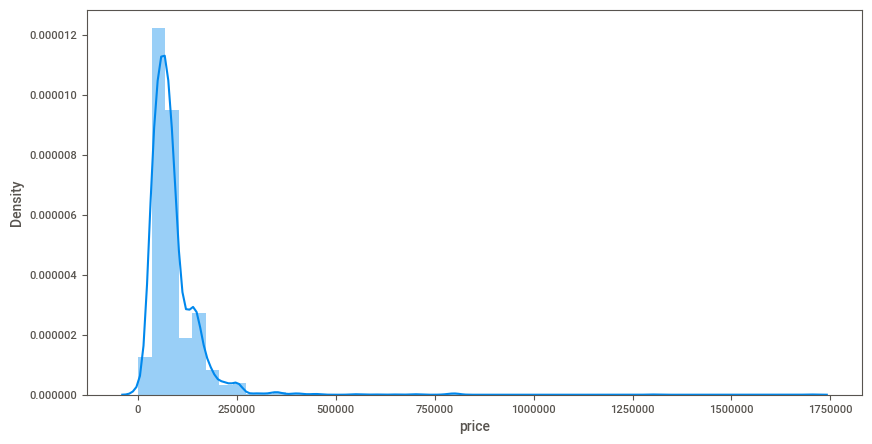

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(AQAR_Data['price'])

<AxesSubplot: xlabel='bedrooms', ylabel='count'>

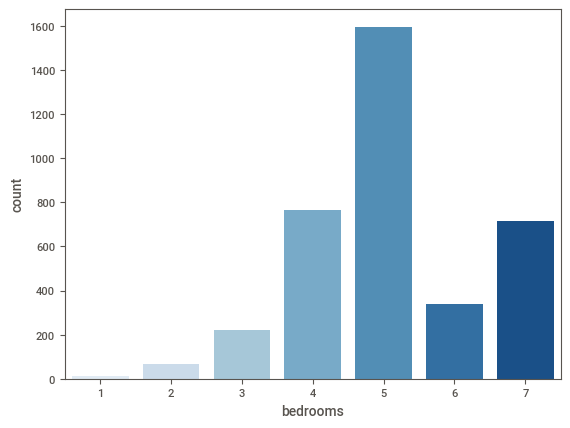

In [13]:
sns.countplot(x=AQAR_Data['bedrooms'],palette='Blues')

### 3.1 Heat Map

C:\Users\hasoo\AppData\Local\Temp\ipykernel_36828\2993140234.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



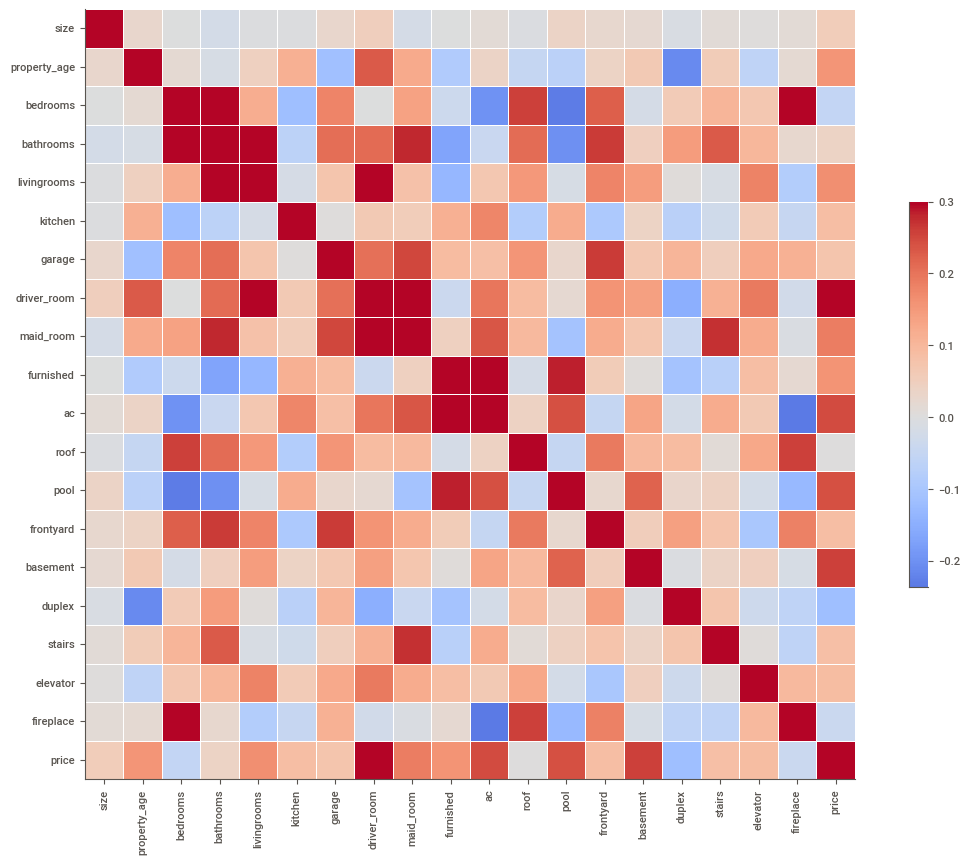

In [14]:
corr = AQAR_Data.corr()
x = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', cmap='coolwarm')
sns.despine()
x.figure.set_size_inches(14,10)
    
plt.show()